**Salário dos cientistas de dados em 2023**

**Resumo**

O objetivo deste estudo é investigar os fatores que influenciam os salários dos Cientistas de Dados. Para isso, foi utilizado um conjunto de dados contendo diversas variáveis ​​relevantes. Este relatório descreve a análise exploratória realizada para compreender a relação entre esses fatores e os salários dos Cientistas de Dados.

**Introdução**

A ciência de dados é um campo em rápido crescimento e os cientistas de dados desempenham um papel crucial na análise e interpretação de grandes volumes de dados. À medida que esta profissão se torna cada vez mais procurada, é importante compreender os fatores que podem influenciar os salários dos Cientistas de Dados. Esta análise centra-se na investigação destes factores e no seu impacto nos salários.

Importando a base de dados

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabela = pd.read_csv('ds_salaries.csv')
display(tabela)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Tratando os dados

In [4]:
# Convertendo a coluna Work_year para data
tabela['work_year'] = pd.to_datetime(tabela['work_year'], format='%Y')

# Verificando modificações
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           3755 non-null   datetime64[ns]
 1   experience_level    3755 non-null   object        
 2   employment_type     3755 non-null   object        
 3   job_title           3755 non-null   object        
 4   salary              3755 non-null   int64         
 5   salary_currency     3755 non-null   object        
 6   salary_in_usd       3755 non-null   int64         
 7   employee_residence  3755 non-null   object        
 8   remote_ratio        3755 non-null   int64         
 9   company_location    3755 non-null   object        
 10  company_size        3755 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 322.8+ KB


In [5]:
# Renomeando colunas
tabela = tabela.rename(columns={
    'work_year': 'Ano de Trabalho',
    'experience_level': 'Experiência',
    'employment_type': 'Tipo de Emprego',
    'job_title': 'Cargo',
    'salary': 'Salário',
    'salary_currency': 'Moeda',
    'salary_in_usd': 'Salário em Usd',
    'employee_residence': 'Páis de Residência',
    'remote_ratio': 'Proporção Remota',
    'company_location': 'Localização da Empresa',
    'company_size': 'Porte'
})


In [6]:
# Substituindo informações dos registros da coluna Experiência
tabela['Experiência'] = tabela['Experiência'].replace({
    'EN': 'Júnior',
    'MI': 'Intermediário',
    'SE': 'Especialista',
    'EX': 'Diretor'
})

# Substituindo informações dos registros da coluna Experiência
tabela['Tipo de Emprego'] = tabela['Tipo de Emprego'].replace({
    'PT': 'Meio período',
    'FT': 'Tempo integral',
    'CT': 'Contrato',
    'FL': 'Autônomo'
})

# Replace company size values
tabela['Porte'] = tabela['Porte'].replace({
   'S': 'Pequeno',
   'M': 'Médio',
   'L': 'Grande'
})

In [7]:
# Visulizando base de dados tratada
display(tabela)

,Ano de Trabalho,Experiência,Tipo de Emprego,Cargo,Salário,Moeda,Salário em Usd,Páis de Residência,Proporção Remota,Localização da Empresa,Porte
0,2023-01-01,Especialista,Tempo integral,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Grande
1,2023-01-01,Intermediário,Contrato,ML Engineer,30000,USD,30000,US,100,US,Pequeno
2,2023-01-01,Intermediário,Contrato,ML Engineer,25500,USD,25500,US,100,US,Pequeno
3,2023-01-01,Especialista,Tempo integral,Data Scientist,175000,USD,175000,CA,100,CA,Médio
4,2023-01-01,Especialista,Tempo integral,Data Scientist,120000,USD,120000,CA,100,CA,Médio
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020-01-01,Especialista,Tempo integral,Data Scientist,412000,USD,412000,US,100,US,Grande
3751,2021-01-01,Intermediário,Tempo integral,Principal Data Scientist,151000,USD,151000,US,100,US,Grande
3752,2020-01-01,Júnior,Tempo integral,Data Scientist,105000,USD,105000,US,100,US,Pequeno
3753,2020-01-01,Júnior,Contrato,Business Data Analyst,100000,USD,100000,US,100,US,Grande


Analisando os dados

In [8]:
df = tabela

# Verificando o período dos Anos na base de dados
anos_unicos = df['Ano de Trabalho'].unique()

ano_maximo = anos_unicos.max()
ano_minimo = anos_unicos.min()

print(f'O período em anos é de: {ano_minimo} até {ano_maximo}')

print('_________________________________________________________________')

# Verificando o total de pagamentos por ano e transformando em porcentagem
pagamentos_por_ano = df['Ano de Trabalho'].value_counts()

# Exibindo os resultados
print(round(pagamentos_por_ano,2))

O período em anos é de: 2020-01-01 00:00:00 até 2023-01-01 00:00:00
_________________________________________________________________
Ano de Trabalho
2023-01-01    1785
2022-01-01    1664
2021-01-01     230
2020-01-01      76
Name: count, dtype: int64


In [21]:
# Analisando as medidas de tendência 
descricao_salarial_usd = df['Salário em Usd'].describe()

print(round(descricao_salarial_usd,2))

count      3755.00
mean     137570.39
std       63055.63
min        5132.00
25%       95000.00
50%      135000.00
75%      175000.00
max      450000.00
Name: Salário em Usd, dtype: float64


In [9]:
# Filtrando para Ciêntistas de dados
df_data_scientists = df[df['Cargo'] == 'Data Scientist']


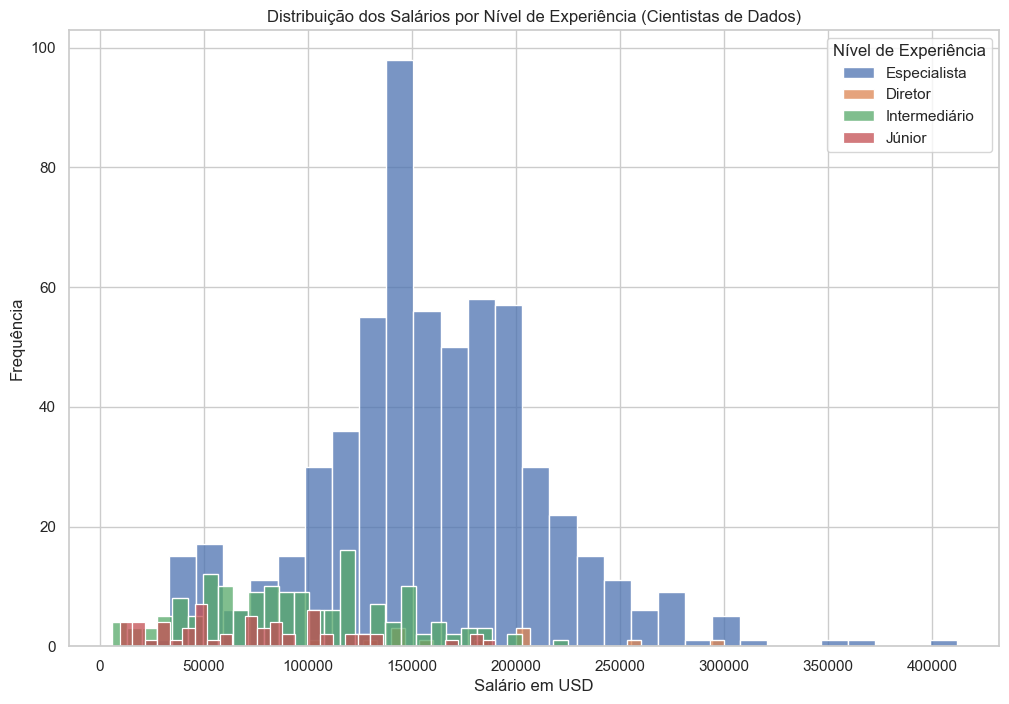

In [23]:
# Variáveis para experiência e salário
experiencia = df_data_scientists['Experiência']
salario_usd = df_data_scientists['Salário em Usd']

plt.figure(figsize=(12, 8))

# Níveis de experiência únicos
niveis_experiencia = experiencia.unique()

# Loop para criar um histograma para cada nível de experiência
for nivel in niveis_experiencia:
    subset = df_data_scientists[df_data_scientists['Experiência'] == nivel]
    sns.histplot(subset['Salário em Usd'], kde=False, label=nivel, bins=30)

# Configurações do gráfico
plt.title('Distribuição dos Salários por Nível de Experiência (Cientistas de Dados)')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.legend(title='Nível de Experiência')
plt.show()


In [11]:
# Qual é o impacto do tipo de emprego (employment_type) no salário?
categorias = df['Tipo de Emprego'].value_counts()
print(categorias)

Tipo de Emprego
Tempo integral    3718
Meio período        17
Contrato            10
Autônomo            10
Name: count, dtype: int64


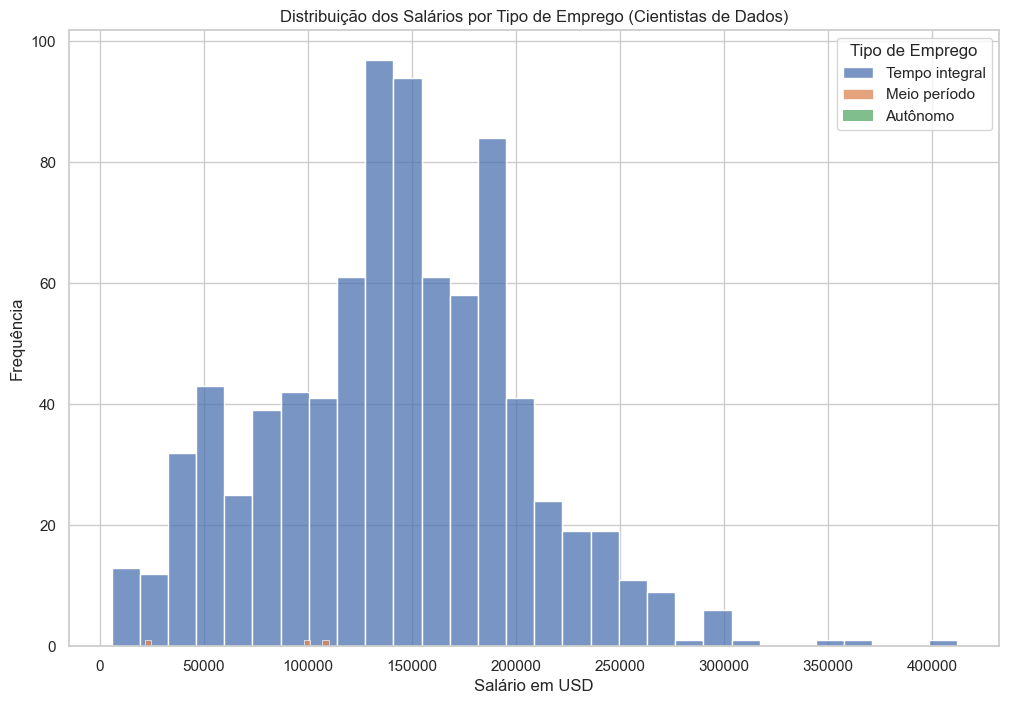

In [22]:
# Variáveis para o tipo de emprego e salário
tipo_de_emprego = df_data_scientists['Tipo de Emprego']
salario = df_data_scientists['Salário em Usd']

plt.figure(figsize=(12, 8))

# Tipos de emprego únicos
tipos_emprego = tipo_de_emprego.unique()

# Loop para criar um histograma para cada tipo de emprego
for tipo in tipos_emprego:
    subset = df_data_scientists[tipo_de_emprego == tipo]
    sns.histplot(subset['Salário em Usd'], kde=False, label=tipo, bins=30)

# Configurações do gráfico
plt.title('Distribuição dos Salários por Tipo de Emprego (Cientistas de Dados)')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.legend(title='Tipo de Emprego')
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_32932\1900138056.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_localizacoes_empresa.index, y=top_10_localizacoes_empresa.values, palette='viridis')


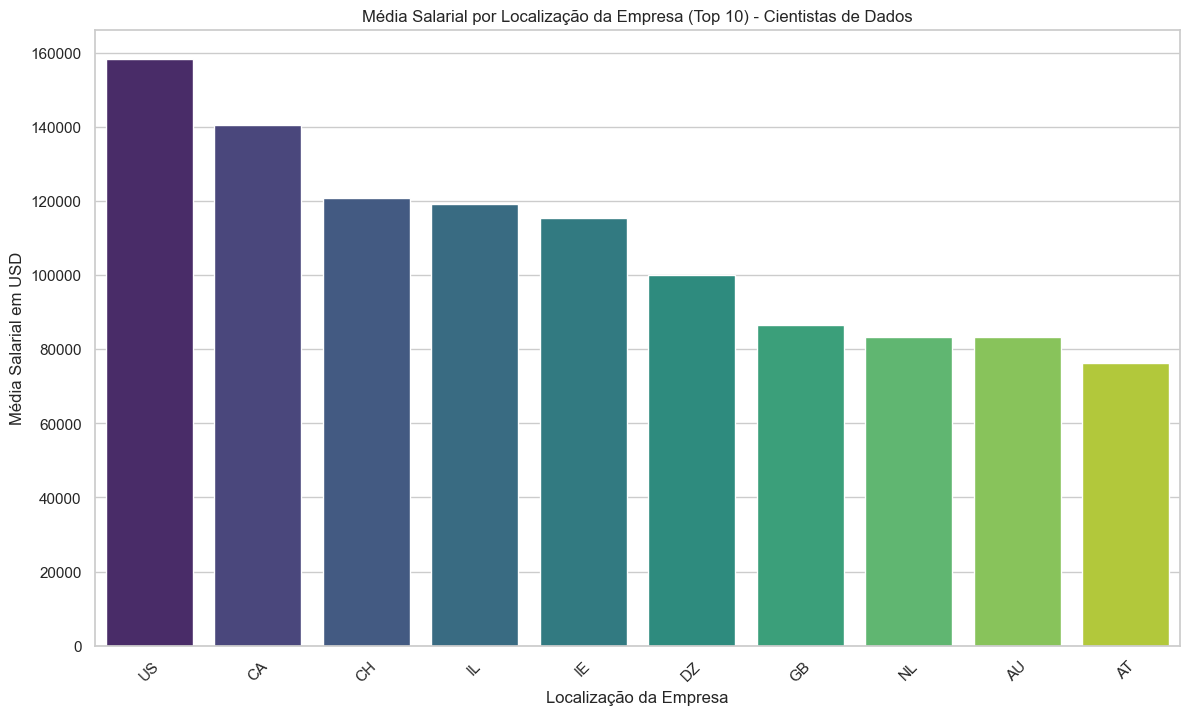

In [24]:
# Como a localização da empresa (company_location) e a residência do funcionário (employee_residence) afetam os salários?

# Variáveis para localização da empresa e salário
localizacao_empresa = df_data_scientists['Localização da Empresa']
salario_usd = df_data_scientists['Salário em Usd']

# Calcular a média salarial por localização da empresa
media_salarial_pela_localizacao_empresa = df_data_scientists.groupby('Localização da Empresa')['Salário em Usd'].mean()

# Selecionar os 10 países com maiores médias salariais
top_10_localizacoes_empresa = media_salarial_pela_localizacao_empresa.nlargest(10)

# Criar gráfico de barras para a localização da empresa
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_localizacoes_empresa.index, y=top_10_localizacoes_empresa.values, palette='viridis')
plt.title('Média Salarial por Localização da Empresa (Top 10) - Cientistas de Dados')
plt.xlabel('Localização da Empresa')
plt.ylabel('Média Salarial em USD')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para melhor visualização
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_32932\3470226086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_paises_maiores_residencias.index, y=top_10_paises_maiores_residencias.values, palette='viridis')


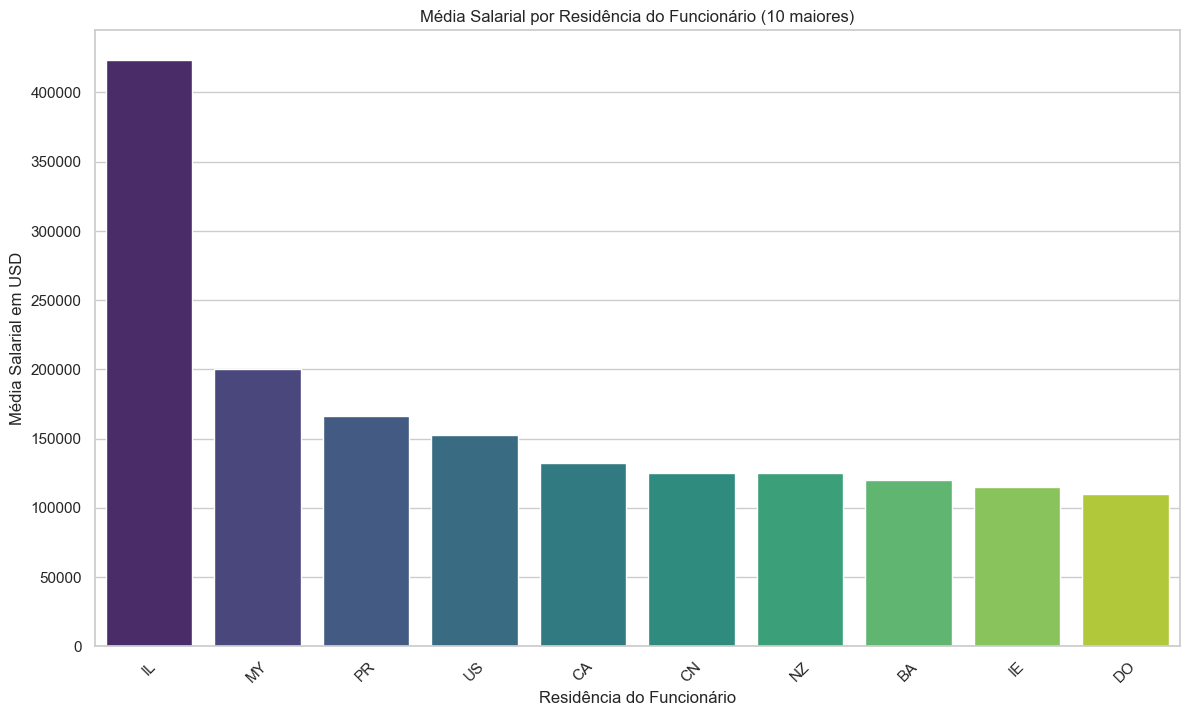

In [15]:

pais_de_residencia = df['Páis de Residência']

# Calcular a média salarial por residência do funcionário
media_salarial_por_pais_residencia = df.groupby('Páis de Residência')['Salário em Usd'].mean()

# Selecionar os 10 países com maiores médias salariais
top_10_paises_maiores_residencias = media_salarial_por_pais_residencia.nlargest(10)

# Criar gráfico de barras para a residência do funcionário
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_paises_maiores_residencias.index, y=top_10_paises_maiores_residencias.values, palette='viridis')
plt.title('Média Salarial por Residência do Funcionário (10 maiores)')
plt.xlabel('Residência do Funcionário')
plt.ylabel('Média Salarial em USD')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para melhor visualização
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_32932\757912616.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_moeda.index, y=media_por_moeda.values, palette='viridis')


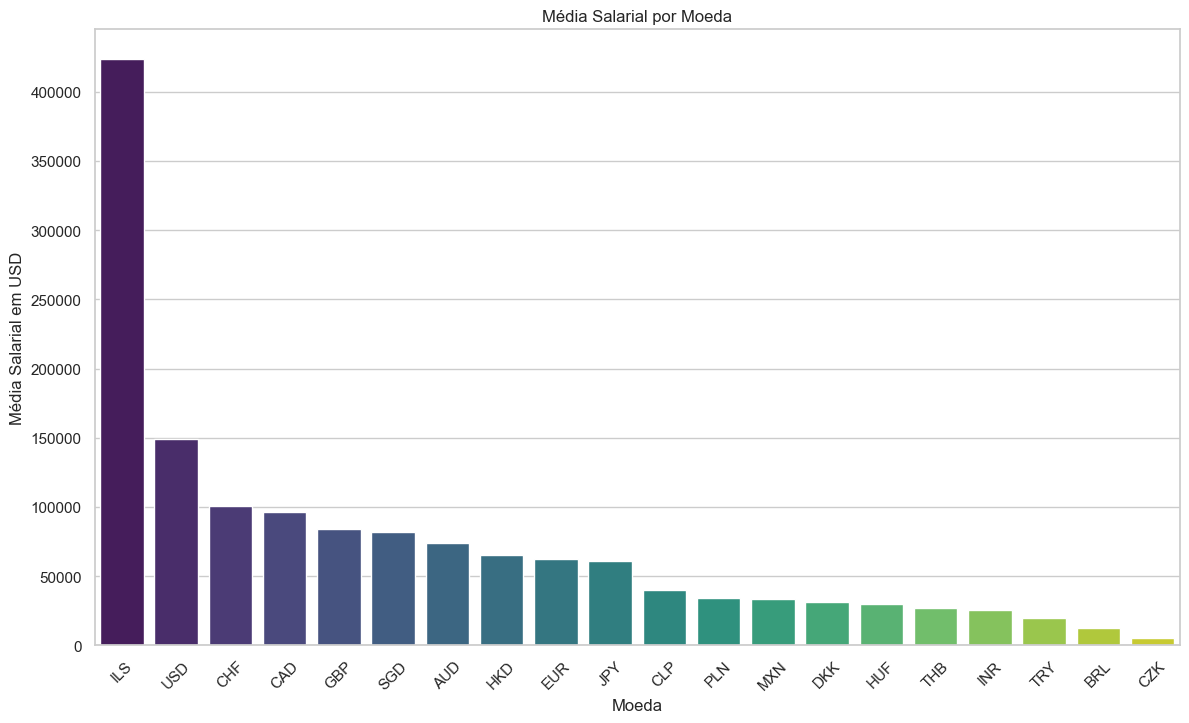

In [19]:
# Os salários variam significativamente entre diferentes moedas (salary_currency) ou países?

# Calcular a média salarial por moeda
media_por_moeda = df.groupby('Moeda')['Salário em Usd'].mean()

# Ordenar as moedas pela média salarial
media_por_moeda = media_por_moeda.sort_values(ascending=False)

# Criar gráfico de barras para a moeda do salário
plt.figure(figsize=(14, 8))
sns.barplot(x=media_por_moeda.index, y=media_por_moeda.values, palette='viridis')
plt.title('Média Salarial por Moeda')
plt.xlabel('Moeda')
plt.ylabel('Média Salarial em USD')
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo x para melhor visualização
plt.show()


** Conclusão**

Ao analisar  os fatores que influenciam os salários de Cientistas de dados, podemos observar que a média salarial em dólares é $13.757

Os profissionais com o nível de Especialistas tendem a ser a maior procura do mercado com uma faixa salarial que está entre 5.000 á 40.000, tornando assim o nível de experiência um fator determinante.

A distribuição dos salários por tipo de emprego (Cientistas de Dados), indica que as contratações por tempo integral também são um fator determinante.

A média salarial por localização da empresa (Top 10) - Cientistas de Dados, indica que os EUA é o país com maior concentração da média salarial, seguido de Canada e China.

A média salarial por moeda é maior no continente Europeu, oq impacta também a variação salarial.

